In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import deque
from time import time

/Users/soung/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/soung/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/soung/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/soung/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
%matplotlib inline

In [3]:
seed = 1546847731
random.seed(seed)
print('Seed: {}'.format(seed))

Seed: 1546847731


# Game Design

게임은 4 칸의 보드로 이루어져있다. agent는 빈칸을 채우면 +1 보상을 받고 채워져 있는 칸을 채우면 -1 보상을 받는다.

In [4]:
class Game:
    board = None
    board_size = 0
    
    def __init__(self, board_size=4):
        self.board_size = board_size
        self.reset()
        
    def reset(self):
        self.board = np.zeros(self.board_size)
    
    def play(self, cell):
        
        if self.board[cell] == 0:
            self.board[cell] = 1
            game_over = len(np.where(self.board == 0)[0]) == 0
            return (1,game_over)
        else:
            return(-1,False)

In [7]:
def state_to_str(state):
    return str(list(map(int,state.tolist())))

all_states = list()
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                s = np.array([i,j,k,l])
                all_states.append(state_to_str(s))
                

print('All possible states:')
for s in all_states:
    print(s)

All possible states:
[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 1, 0]
[0, 0, 1, 1]
[0, 1, 0, 0]
[0, 1, 0, 1]
[0, 1, 1, 0]
[0, 1, 1, 1]
[1, 0, 0, 0]
[1, 0, 0, 1]
[1, 0, 1, 0]
[1, 0, 1, 1]
[1, 1, 0, 0]
[1, 1, 0, 1]
[1, 1, 1, 0]
[1, 1, 1, 1]


# Initialize game

In [9]:
game = Game()

# Q learning

In [10]:
num_of_games = 2000
epsilon = 0.1
gamma =1 

In [11]:
q_table = pd.DataFrame(0, index = np.arange(4), columns=all_states)

In [15]:
q_table.head()

,"[0, 0, 0, 0]","[0, 0, 0, 1]","[0, 0, 1, 0]","[0, 0, 1, 1]","[0, 1, 0, 0]","[0, 1, 0, 1]","[0, 1, 1, 0]","[0, 1, 1, 1]","[1, 0, 0, 0]","[1, 0, 0, 1]","[1, 0, 1, 0]","[1, 0, 1, 1]","[1, 1, 0, 0]","[1, 1, 0, 1]","[1, 1, 1, 0]","[1, 1, 1, 1]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
r_list = []  # store the total reward of each game so we can plot it later

for g in range(num_of_games):
    game_over = False
    game.reset()
    total_reward = 0
    while not game_over:
        #앱실론을 통해서 랜덤한 경우도 겪을 수 있게 해줌
        state = np.copy(game.board)
        if random.random() < epsilon:
            action = random.randint(0,3)
        else:
            action = q_table[state_to_str(state)].idxmax()
        reward, game_over = game.play(action)
        total_reward += reward
        if np.sum(game.board) == 4:  # terminal state
            next_state_max_q_value = 0
        else:
            next_state = np.copy(game.board)
            next_state_max_q_value = q_table[state_to_str(next_state)].max()
        q_table.loc[action,state_to_str(state)] = reward + gamma * next_state_max_q_value
    r_list.append(total_reward)
    
q_table


,"[0, 0, 0, 0]","[0, 0, 0, 1]","[0, 0, 1, 0]","[0, 0, 1, 1]","[0, 1, 0, 0]","[0, 1, 0, 1]","[0, 1, 1, 0]","[0, 1, 1, 1]","[1, 0, 0, 0]","[1, 0, 0, 1]","[1, 0, 1, 0]","[1, 0, 1, 1]","[1, 1, 0, 0]","[1, 1, 0, 1]","[1, 1, 1, 0]","[1, 1, 1, 1]"
0,4,3,3,2,3,2,2,0,2,1,1,-1,1,0,0,0
1,4,3,0,0,2,0,1,0,3,2,2,1,1,0,0,0
2,4,3,2,0,3,0,-1,0,3,2,1,0,2,1,0,0
3,4,2,3,0,3,1,0,0,3,1,2,0,2,0,1,0


In [19]:

for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                b = np.array([i,j,k,l])
                if len(np.where(b == 0)[0]) != 0:
                    action = q_table[state_to_str(b)].idxmax()
                    pred = q_table[state_to_str(b)].tolist()
                    print('board: {b}\tpredicted Q values: {p} \tbest action: {a}\tcorrect action? {s}'
                          .format(b=b,p=pred,a=action,s=b[action]==0))

board: [0 0 0 0]	predicted Q values: [4, 4, 4, 4] 	best action: 0	correct action? True
board: [0 0 0 1]	predicted Q values: [3, 3, 3, 2] 	best action: 0	correct action? True
board: [0 0 1 0]	predicted Q values: [3, 0, 2, 3] 	best action: 0	correct action? True
board: [0 0 1 1]	predicted Q values: [2, 0, 0, 0] 	best action: 0	correct action? True
board: [0 1 0 0]	predicted Q values: [3, 2, 3, 3] 	best action: 0	correct action? True
board: [0 1 0 1]	predicted Q values: [2, 0, 0, 1] 	best action: 0	correct action? True
board: [0 1 1 0]	predicted Q values: [2, 1, -1, 0] 	best action: 0	correct action? True
board: [0 1 1 1]	predicted Q values: [0, 0, 0, 0] 	best action: 0	correct action? True
board: [1 0 0 0]	predicted Q values: [2, 3, 3, 3] 	best action: 1	correct action? True
board: [1 0 0 1]	predicted Q values: [1, 2, 2, 1] 	best action: 1	correct action? True
board: [1 0 1 0]	predicted Q values: [1, 2, 1, 2] 	best action: 1	correct action? True
board: [1 0 1 1]	predicted Q values: [-1, 

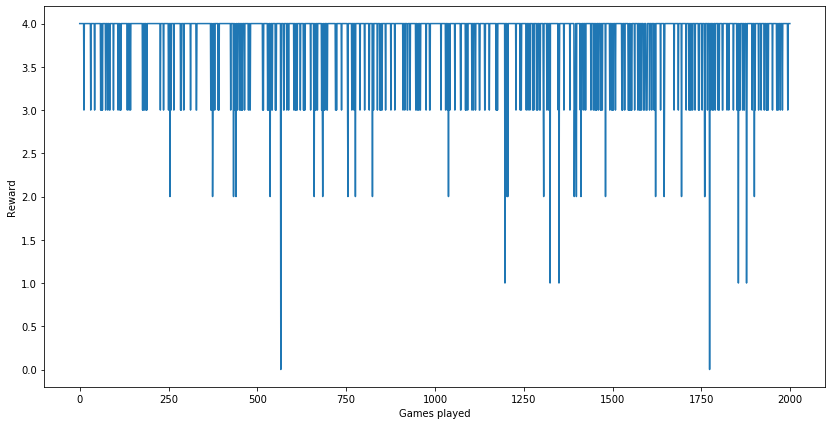

In [20]:
plt.figure(figsize=(14,7))
plt.plot(range(len(r_list)),r_list)
plt.xlabel('Games played')
plt.ylabel('Reward')
plt.show()
